<a href="https://colab.research.google.com/github/aniketinamdar/StockPrediction-using-LSTM/blob/main/stoxx(dynamic).ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

##Installing dependencies

In [ ]:
!pip install yfinance

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     |████████████████████████████████| 62 kB 1.7 MB/s 
  Attempting uninstall: requests
    Found existing installation: requests 2.23.0
    Uninstalling requests-2.23.0:
      Successfully uninstalled requests-2.23.0


##Importing dependencies

In [ ]:
import yfinance as yf

In [ ]:
import matplotlib.pyplot as plt

In [ ]:
import numpy as np

In [ ]:
from sklearn.preprocessing import MinMaxScaler

In [ ]:
from keras.models import Sequential
from keras.layers import Dense, LSTM

##Loading data from yfinance

In [ ]:
stox_symb = "AAPL"

In [ ]:
data = yf.download(tickers=stox_symb,period="5y",interval="1d")

[*********************100%***********************]  1 of 1 completed


In [ ]:
type(data)

pandas.core.frame.DataFrame

In [ ]:
data.head()

,Open,High,Low,Close,Adj Close,Volume
Date,,,,,,
2017-11-17,42.759998,42.847500,42.410000,42.537498,40.448906,87598000
2017-11-20,42.572498,42.639999,42.389999,42.494999,40.408474,65049600
2017-11-21,42.695000,43.424999,42.695000,43.285000,41.159691,100525200
2017-11-22,43.340000,43.750000,43.262501,43.740002,41.592354,102355600
2017-11-24,43.775002,43.875000,43.662498,43.742500,41.594727,56106800


In [ ]:
len(data)

1258

In [ ]:
data.tail()

,Open,High,Low,Close,Adj Close,Volume
Date,,,,,,
2022-11-10,141.240005,146.869995,139.500000,146.869995,146.869995,118854000
2022-11-11,145.820007,150.009995,144.369995,149.699997,149.699997,93903800
2022-11-14,148.970001,150.279999,147.429993,148.279999,148.279999,73374100
2022-11-15,152.220001,153.589996,148.559998,150.039993,150.039993,89868300
2022-11-16,149.130005,149.869995,147.289993,148.789993,148.789993,64170900


In [ ]:
opn=data[['Open']]

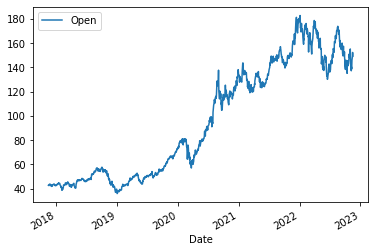

In [ ]:
opn.plot()

In [ ]:
ds = opn.values

In [ ]:
ds

array([[ 42.75999832],
       [ 42.57249832],
       [ 42.69499969],
       ...,
       [148.97000122],
       [152.22000122],
       [149.13000488]])

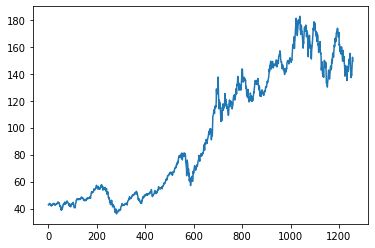

In [ ]:
plt.plot(ds)

##Using min max scaler for normalizing

In [ ]:
normalizer = MinMaxScaler(feature_range=(0,1))
ds_scaled = normalizer.fit_transform(np.array(ds).reshape(-1,1))

In [ ]:
len(ds_scaled),len(ds)

(1258, 1258)

In [ ]:
train_size = int(len(ds_scaled)*0.7)
test_size = len(ds_scaled) - train_size

In [ ]:
train_size,test_size

(880, 378)

In [ ]:
ds_train,ds_test=ds_scaled[0:train_size,:],ds_scaled[train_size:len(ds_scaled),:1]

In [ ]:
len(ds_train),len(ds_test)

(880, 378)

In [ ]:
def create_ds(dataset,step):
    Xtrain, Ytrain = [], []
    for i in range(len(dataset)-step-1):
        a = dataset[i:(i+step), 0]
        Xtrain.append(a)
        Ytrain.append(dataset[i + step, 0])
    return np.array(Xtrain), np.array(Ytrain)

In [ ]:

time_stamp = 100
X_train, y_train = create_ds(ds_train,time_stamp)
X_test, y_test = create_ds(ds_test,time_stamp)

In [ ]:
X_train.shape,y_train.shape

((779, 100), (779,))

In [ ]:
X_test.shape, y_test.shape

((277, 100), (277,))

##Reshaping data to fit into LSTM model

In [ ]:
X_train = X_train.reshape(X_train.shape[0],X_train.shape[1] , 1)
X_test = X_test.reshape(X_test.shape[0],X_test.shape[1] , 1)

In [ ]:
model = Sequential()
model.add(LSTM(units=50,return_sequences=True,input_shape=(X_train.shape[1],1)))
model.add(LSTM(units=50,return_sequences=True))
model.add(LSTM(units=50))
model.add(Dense(units=1,activation='linear'))
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 lstm (LSTM)                 (None, 100, 50)           10400     
                                                                 
 lstm_1 (LSTM)               (None, 100, 50)           20200     
                                                                 
 lstm_2 (LSTM)               (None, 50)                20200     
                                                                 
 dense (Dense)               (None, 1)                 51        
                                                                 
Total params: 50,851
Trainable params: 50,851
Non-trainable params: 0
_________________________________________________________________


##Training model with adam optimizer and mean squared error loss fun

In [ ]:
model.compile(loss='mean_squared_error',optimizer='adam')
model.fit(X_train,y_train,validation_data=(X_test,y_test),epochs=100,batch_size=64)

Epoch 1/100
13/13 [==============================] - 10s 112ms/step - loss: 0.0323 - val_loss: 0.0774
Epoch 2/100
13/13 [==============================] - 0s 22ms/step - loss: 0.0059 - val_loss: 0.0054
Epoch 3/100
13/13 [==============================] - 0s 20ms/step - loss: 0.0016 - val_loss: 0.0044
Epoch 4/100
13/13 [==============================] - 0s 21ms/step - loss: 0.0014 - val_loss: 0.0053
Epoch 5/100
13/13 [==============================] - 0s 23ms/step - loss: 0.0012 - val_loss: 0.0053
Epoch 6/100
13/13 [==============================] - 0s 21ms/step - loss: 0.0012 - val_loss: 0.0065
Epoch 7/100
13/13 [==============================] - 0s 21ms/step - loss: 0.0011 - val_loss: 0.0053
Epoch 8/100
13/13 [==============================] - 0s 21ms/step - loss: 0.0011 - val_loss: 0.0045
Epoch 9/100
13/13 [==============================] - 0s 22ms/step - loss: 0.0010 - val_loss: 0.0040
Epoch 10/100
13/13 [==============================] - 0s 21ms/step - loss: 0.0010 - val_loss: 0.00

In [ ]:
model.save('lstm.h5')

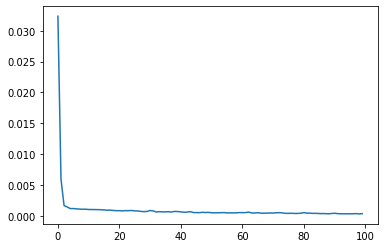

In [ ]:
loss = model.history.history['loss']
plt.plot(loss)

#Predicitng on train and test data

In [ ]:
train_predict = model.predict(X_train)
test_predict = model.predict(X_test)

9/9 [==============================] - 0s 7ms/step


#Inverse transform to get actual value

In [ ]:
train_predict = normalizer.inverse_transform(train_predict)
test_predict = normalizer.inverse_transform(test_predict)

#Comparing using visuals

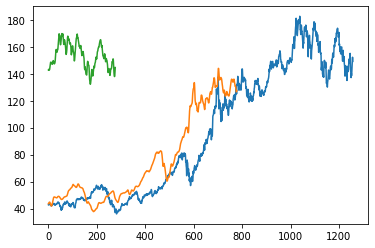

In [ ]:
plt.plot(normalizer.inverse_transform(ds_scaled))
plt.plot(train_predict)
plt.plot(test_predict)

In [ ]:
type(train_predict)

numpy.ndarray

In [ ]:
test = np.vstack((train_predict,test_predict))

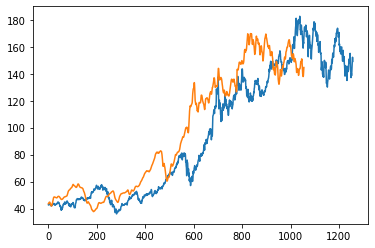

In [ ]:
plt.plot(normalizer.inverse_transform(ds_scaled))
plt.plot(test)

In [ ]:
len(ds_test)

378

In [ ]:
fut_inp = ds_test[len(ds_test)-100:]

In [ ]:
fut_inp = fut_inp.reshape(1,-1)

In [ ]:
tmp_inp = list(fut_inp)

In [ ]:
fut_inp.shape

(1, 100)

#Creating list of the last 100 data

In [ ]:
tmp_inp = tmp_inp[0].tolist()

In [ ]:
lst_output=[]
n_steps=100
i=0
while(i<30):
    
    if(len(tmp_inp)>100):
        fut_inp = np.array(tmp_inp[1:])
        fut_inp=fut_inp.reshape(1,-1)
        fut_inp = fut_inp.reshape((1, n_steps, 1))
        yhat = model.predict(fut_inp, verbose=0)
        tmp_inp.extend(yhat[0].tolist())
        tmp_inp = tmp_inp[1:]
        lst_output.extend(yhat.tolist())
        i=i+1
    else:
        fut_inp = fut_inp.reshape((1, n_steps,1))
        yhat = model.predict(fut_inp, verbose=0)
        tmp_inp.extend(yhat[0].tolist())
        lst_output.extend(yhat.tolist())
        i=i+1
    

print(lst_output)

[[0.7762758135795593], [0.7784868478775024], [0.7770037055015564], [0.7736013531684875], [0.7690016627311707], [0.7636585235595703], [0.7579512596130371], [0.7522051930427551], [0.7466855645179749], [0.7415925860404968], [0.7370638847351074], [0.7331799864768982], [0.7299724221229553], [0.7274332642555237], [0.7255236506462097], [0.7241836190223694], [0.7233389616012573], [0.7229087352752686], [0.7228102684020996], [0.7229639291763306], [0.7232961654663086], [0.7237419486045837], [0.7242458462715149], [0.7247625589370728], [0.7252569198608398], [0.7257029414176941], [0.7260840535163879], [0.7263898253440857], [0.7266169786453247], [0.7267664074897766]]


In [ ]:
len(ds_scaled)

1258

In [ ]:
plot_new=np.arange(1,101)
plot_pred=np.arange(101,131)

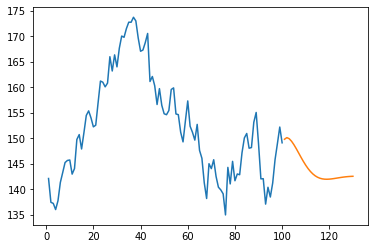

In [ ]:
plt.plot(plot_new, normalizer.inverse_transform(ds_scaled[len(ds_scaled)-100:]))
plt.plot(plot_pred, normalizer.inverse_transform(lst_output))

In [ ]:
ds_new = ds_scaled.tolist()

In [ ]:
len(ds_new)

1258

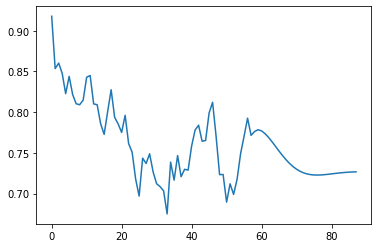

In [ ]:
ds_new.extend(lst_output)
plt.plot(ds_new[1200:])

In [ ]:
final_graph = normalizer.inverse_transform(ds_new).tolist()

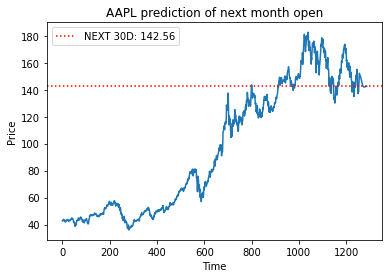

In [ ]:
plt.plot(final_graph,)
plt.ylabel("Price")
plt.xlabel("Time")
plt.title("{0} prediction of next month open".format(stox_symb))
plt.axhline(y=final_graph[len(final_graph)-1], color = 'red', linestyle = ':', label = 'NEXT 30D: {0}'.format(round(float(*final_graph[len(final_graph)-1]),2)))
plt.legend()